### Description
In this quick overview of Selenium, salaries of NBA players will be
collected from https://hoopshype.com/salaries/players/ as shown below.

###### Reference: https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a

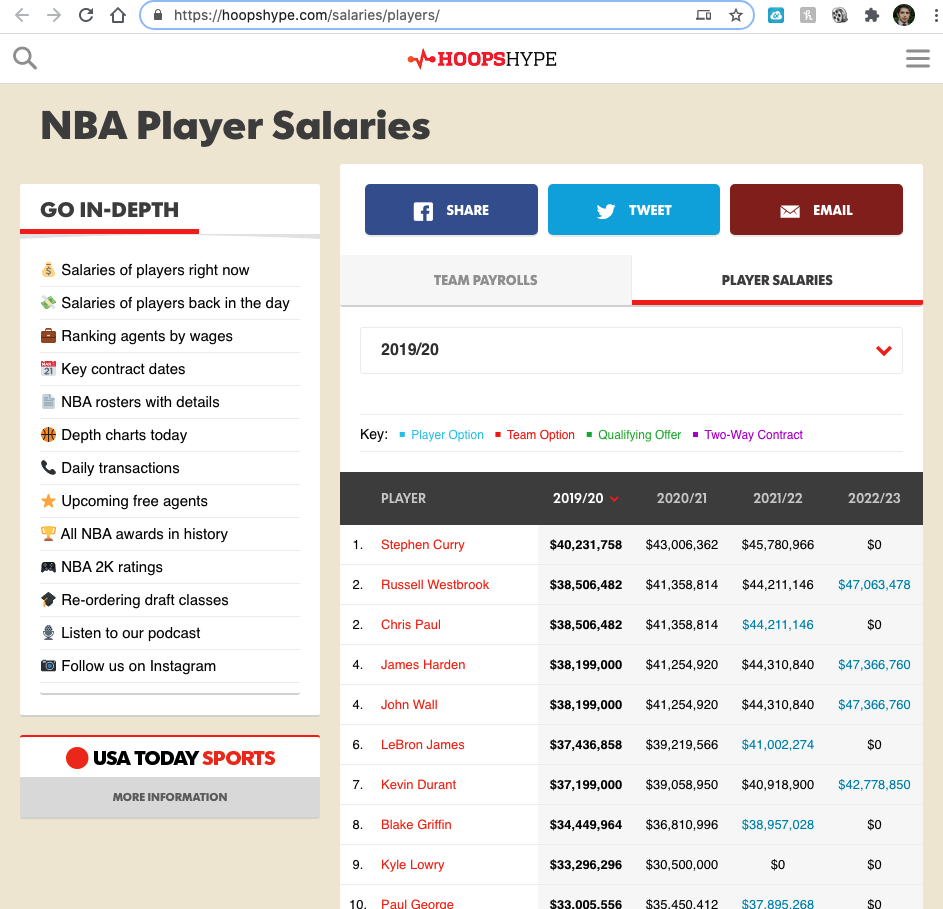

### Step 1: Import libraries

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd

### Step 2: Input the link to investigate

driver = webdriver.Chrome('/Users/lightning/Desktop/NN_Projects/WebCrawling/chromedriver')

url = 'https://hoopshype.com/salaries/players/'


driver.get(url)


### Step 3: Find XPath of the information
To find the XPATH of each salary for all players, we inspect Stephen Curry:
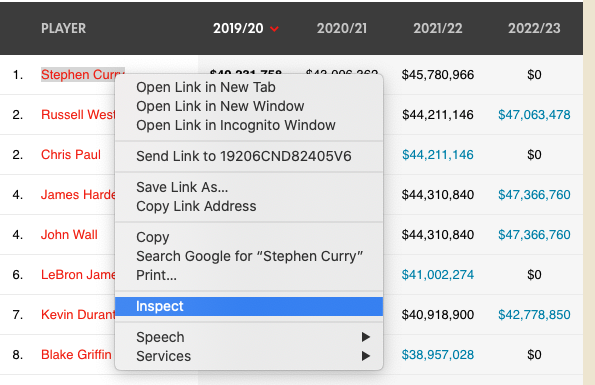

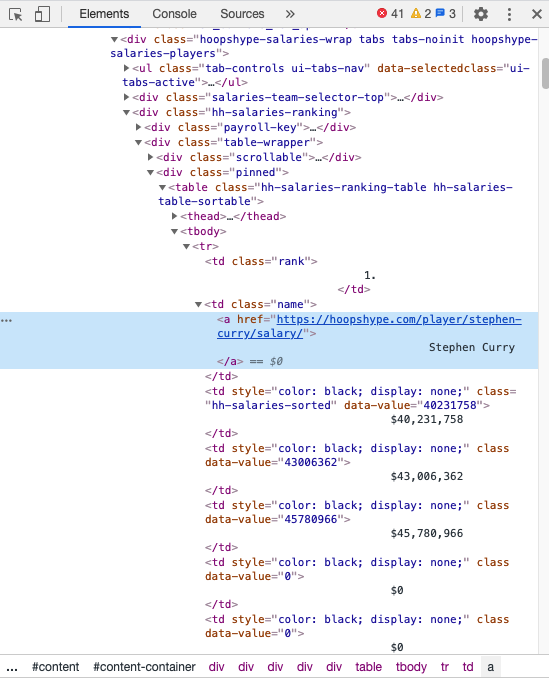

### Step 4: Find attributes that refer to players
Using the find by xpath function, refer to the name attribute.

players = driver.find_elements_by_xpath('//td[@class="name"]')

### Step 5: Collecting list of all players
Create a list of all players that are listed.

players_list = []

for p in range(len(players)):
    
    players_list.append(players[p].text)

### Step 6: Follow the same process to collect salaries
This time inspect salary.
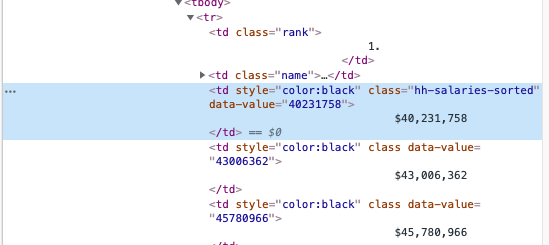

The portion of the XPath that we care about is salaries, so:

salaries = driver.find_elements_by_xpath('//td[@class="hh-salaries-sorted"]')

and we will have them collected in a list:

salaries_list = []

for s in range(len(salaries)):
    
    salaries_list.append(salaries[s].text)

### Step 7: Retrieve data from multiple pages of the same website
If we want to collect data that is located on different pages of the same website using Selenium, we can inspect the difference in the URL. For the current website, the only change is the year at the end of the link, for example:

https://hoopshype.com/salaries/players/2018-2019/

or 

https://hoopshype.com/salaries/players/1995-1996/

a loop can be defined to go through all pages, collect the data and input them in a dataframe.

In [8]:
df = pd.DataFrame(columns=['Player','Salary','Year']) # creates master dataframe 

driver = webdriver.Chrome('/Users/lightning/Desktop/NN_Projects/WebCrawling/chromedriver')

for yr in range(1990,2019):
    page_num = str(yr) + '-' + str(yr+1) +'/'
    url = 'https://hoopshype.com/salaries/players/' + page_num
    driver.get(url)
    
    players = driver.find_elements_by_xpath('//td[@class="name"]')
    salaries = driver.find_elements_by_xpath('//td[@class="hh-salaries-sorted"]') 
    
    players_list = []
    for p in range(len(players)):
        players_list.append(players[p].text)
    
    salaries_list = []
    for s in range(len(salaries)):
        salaries_list.append(salaries[s].text)
    
    data_tuples = list(zip(players_list[1:],salaries_list[1:])) # list of each players name and salary paired together
    temp_df = pd.DataFrame(data_tuples, columns=['Player','Salary']) # creates dataframe of each tuple in list
    temp_df['Year'] = yr # adds season beginning year to each dataframe
    df = df.append(temp_df) # appends to master dataframe
    
driver.close()

### Step 8: Export the data to an excel sheet for later use.
Depends on your prefernce use "xlsx" or "csv" formats.

In [ ]:
df.to_excel("NBA_Salary.xlsx") 
#df.to_csv('NBA_Salary.csv',index=False)

Final results:
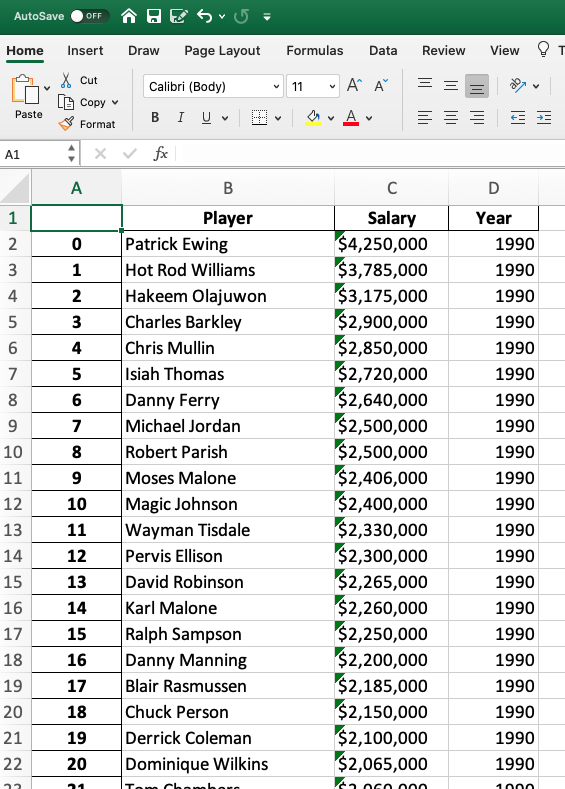